<a href="https://colab.research.google.com/github/jessikamorais/FIAP/blob/main/projeto_modulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Síndrome da Fadiga Crônica (EM/SFC) e Depressão

A **síndrome de fadiga crônic**a, também conhecida como  **Encefalomielite Miálgica,** é caracterizada por deixar o portador com uma sensação de estar extremamente cansado o tempo todo, mesmo após uma boa noite de sono. Esta condição pode piorar após qualquer tipo de atividade, exercício físico ou mental. A pessoa fica exausta para fazer quase todas as suas atividades diárias, como: tomar banho, ir ao trabalho, fazer serviços domésticos e demais atividades que necessitem siar de casa.

Além da fadiga, a doença pode gerar sintomas como: dificuldade para dormir ou acordar, tontura, fraqueza muscular, dor de garganta, problemas digestivos, calafrios, suores noturnos, alergias ou reações alimentares, sensibilidade à luz ou à ruídos, batimentos cardíacos irregulares e falta de ar.

A **depressão **é uma doença de humor, que pode causar tristeza profunda ou apatia constante, em que o indivíduo não sente mais prazer ou sentido na vida, com sentimos de culpa, vazio e inutilidade. Em casos mais graves, o portador da doença pode pensar ou realmente atentar contra a própria vida.

Na depressão, sintomas como fadiga também podem estar presentes, assim como, problemas de sono (dormir muito ou pouco), falta de energia para realizar tarefas simples,  ansiedade, lapsos de memórias ou concentração, fala ou movimentos lentos, dor sem causa física, problemas digestivos ou cólicas abdominais e inquietação.

As duas doenças são crônicas e podem durar anos, com períodos de melhora e outros de piora do quadro. Ambas as condições tem sintomas parecidos, tais como: fadiga, problemas de sono, falta de energia, dor, problemas digestivos, dores de cabeça, lapsos de memória ou dificuldade de concentração. A depender dos sintomas, pode haver dificuldade do diagnóstico correto para o paciente, que pode apresentar uma das comorbidades ou ambas.


### Fonte de Dados:

O conjunto de dados utilizado é sintetíco, desenvolvimendo para tarefas de classificação das doenças: Encefalomielite Miálgica/Síndrome da Fadiga Crônica (EM/SFC) e/ou Depressão.

Este é o primeiro conjunto de dados desse tipo criado especificamente para ajudar iniciantes na área e pesquisadores a explorar casos complexos de diagnóstico em condições mentais e crônicas de saúde.



# **Explicação das variáveis presentes nos dados:**

* **age** -	Idade do paciente:
    * Variando de 18 à 70 anos.
* **gender** -	Gênero:
    * Feminio,
    * Masculino.
* **fatigue_severity_scale_score** -	Escala de Gravidade da Fadiga;
    * Escala de 1 à 10.
* **depression_phq9_score** -	PHQ-9 Índice de depressão, questionário que avalia a gravidade de depressão do paciente em que as questões somam um valor de 1 à 27, e classificam a depressão como a seguir:
    * 1-4 - Depressão mínima
    * 5-9 - Depressão Leve
    * 10-14 - Depressão Moderada
    * 15-19 - Depressão Moderadamente Grave
    * 19-27 - Depressão grave
* **pem_present	Whether** - Mal-estar pós-esforço está presente?
    * Sim,
    * Não.
* **pem_duration_hours** -	Duração do mal-estar pós-esforço (PEM) em horas;
* **sleep_quality_index** -	Qualidade do sono;
    * Escala de 1 à 10.
* **brain_fog_level** -	Confusão mental / Dificuldade de concentração;
    * Escala de 1 à 10.
* **physical_pain_score** -	Intesidade da dor física;
    * Escala de 1 à 10.
* **stress_level** - Nível de estresse
    * Escala de 1 à 10.
* **work_status** -	Status de trabalho:
    * Trabalhando,
    * Trabalho parcial,
    * Sem trabalho.
* **social_activity_level** - Nível de atividade social:
    * Muito alto,
    * Alto,
    * Médio,
    * Baixo,
    * Muito baixo.
* **exercise_frequency** - Frequência de atividade física:
    * Diariamente,
    * Frequentemente,
    * Às vezes,
    * Raramente,
    * Nunca.
* **meditation_or_mindfulness** - O paciente pratica mindfulness ou meditação?  
    * Sim,
    * Não.
* **hours_of_sleep_per_night** - Duração média do sono por noite
* **diagnosis** - Diagnóstico (qual(is) doença(s) o paciente tem)? **(Variável Target)**
    * ME/CFS,
    * Depressão,
    * Ambas.

A base de dados pode ser acessada no seguinte link: [Dados do projeto](https://www.kaggle.com/datasets/storytellerman/mecfs-vs-depression-classification-dataset)

# **`Importando as bibliotecas`**

In [1]:
import pandas as pd # Para trabalhar com dados tabulares
from sklearn.model_selection import train_test_split #separação dos dados
from sklearn.neighbors import KNeighborsClassifier #modelo de machine learning classificação
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score #avaliação do modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score #métrica de avaliação
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Feature Engineer
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
import numpy as np #transformação dos dados
from sklearn.preprocessing import OrdinalEncoder #TESTE PARA ORDENAÇÃO DE DADOS CATEGÓRICOS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# **Importando os dados**

In [2]:
data = pd.read_csv('me_depression_data.csv', sep=',')

# **Analisando os dados**

A base de dados utilizada possui uma dimensão de 16 colunas e 1000 linhas de dados. Com dados numéricos e categóricos.

In [3]:
data.shape

(1000, 16)

In [4]:
data.head(5)

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,Working,Low,Often,Yes,Both
2,46,Female,4.0,5.4,4.8,NaN,24.0,1.6,13.0,6.9,0,Partially working,NaN,Rarely,Yes,Depression
3,32,Female,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,Not working,High,Never,Yes,Depression
4,60,Female,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,Not working,Low,Rarely,No,Both


In [5]:
data.describe()

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present
count,1000.000000,953.000000,952.000000,966.000000,952.000000,978.000000,979.000000,976.000000,979.000000,1000.000000
mean,44.385000,5.468625,5.611765,5.521843,5.459139,12.268916,6.407252,23.105533,6.571297,0.599000
std,15.321669,2.571423,2.649316,2.565460,2.566536,6.306588,2.206937,13.823953,2.040320,0.490346
min,18.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,31.750000,3.100000,3.300000,3.325000,3.300000,9.000000,6.300000,11.000000,4.800000,0.000000
50%,45.000000,5.600000,5.800000,5.600000,5.400000,10.000000,7.000000,23.000000,6.600000,1.000000
75%,57.000000,7.700000,7.900000,7.800000,7.700000,16.000000,7.500000,35.000000,8.350000,1.000000
max,70.000000,10.000000,10.000000,10.000000,10.000000,27.000000,10.000000,47.000000,10.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1000 non-null   int64  
 1   gender                        1000 non-null   object 
 2   sleep_quality_index           953 non-null    float64
 3   brain_fog_level               952 non-null    float64
 4   physical_pain_score           966 non-null    float64
 5   stress_level                  952 non-null    float64
 6   depression_phq9_score         978 non-null    float64
 7   fatigue_severity_scale_score  979 non-null    float64
 8   pem_duration_hours            976 non-null    float64
 9   hours_of_sleep_per_night      979 non-null    float64
 10  pem_present                   1000 non-null   int64  
 11  work_status                   953 non-null    object 
 12  social_activity_level         960 non-null    object 
 13  exer

Podemos observar que as únicas variáveis que não possuem valores nulos são: "age", "gender", "pem_present" e "diagnosis", possuindo 1000 linhas de informações preenchidas (não nulas).
As demais variáveis posssuem valores nulos, que devem ser tratados no decorrer do projeto.

# Analisando as variáveis categóricas

As variáveis: "gender", "work_status", "social_activity_level", "exercise_frequency", "meditation_e_mindfulness", "diagnosis", são variáveis do tipo texto que serão analisadas a seguir:

*  Variável: Gênero (**gender**) possui dois valores, Feminino (Female) e Masculino (Male), sem nenhum valor NaN (Not a number). Com uma maior quantidade de pacientes do gênero feminino (4,8% maior).


In [7]:
set(data["gender"])

{'Female', 'Male'}

In [8]:
data["gender"].value_counts()

,count
gender,
Male,524
Female,476


*   Variável: Status de trabalho (**work_status**), possui três valores, Trabalhando (Working), Trabalho parcial (Partiallly working) e Sem trabalho (Not working) com uma distribuição de valores relativamente próxima, de desvio padrão 18,61. E contabilizando 47 valores NaN ao todo.

In [9]:
set(data["work_status"])

{'Not working', 'Partially working', 'Working', nan}

In [10]:
data["work_status"].value_counts()

,count
work_status,
Partially working,335
Working,320
Not working,298


In [11]:
work_count = data["work_status"].value_counts().values
std_work = np.std(work_count, ddof=1)
print(f"Desvio padrão: {std_work:.2f}")

Desvio padrão: 18.61


Calculando a quantidade de valores "NaN" na variável:

In [12]:
data["work_status"].isna().sum()

np.int64(47)

*  Variável: Nível de Atividade Social (**social_activity_level**), com cinco valores, Muito alto (Very high), Alto (Hight), Médio (Medium), Baixo (Low) e Muito baixo (Very low). Sendo os valores distribuidos de forma muito próxima (desvio padrão de 9,30) e contabililzando 40 valores NaN ao todo.

In [13]:
set(data["social_activity_level"])

{'High', 'Low', 'Medium', 'Very high', 'Very low', nan}

In [14]:
data["social_activity_level"].value_counts()

,count
social_activity_level,
Very low,203
High,200
Low,190
Very high,186
Medium,181


In [15]:
activity_count = data["social_activity_level"].value_counts().values
std_activity = np.std(activity_count, ddof=1)
print(std_activity)

9.300537618869138


Calculando a quantidade de valores "NaN" na variável:

In [16]:
data["social_activity_level"].isna().sum()

np.int64(40)

Variável: Frequência de atividade física (**exercise_frequency**), com cinco valores, Diariamente (Daily), Frequentemente (Often), Às vezes (Sometime), Raramente (Rarely) e Nunca (Never). Como podemos ver no desvio padrão da contagem dos dados (15,27), estes apresentam uma proporção razoável entre si. E com 39 valores NaN.

In [17]:
set(data["exercise_frequency"])

{'Daily', 'Never', 'Often', 'Rarely', 'Sometimes', nan}

In [18]:
data["exercise_frequency"].value_counts()

,count
exercise_frequency,
Rarely,210
Often,202
Daily,194
Sometimes,184
Never,171


In [19]:
exercise_count = data["exercise_frequency"].value_counts().values
std_activity = np.std(exercise_count, ddof=1)
print(f"Desvio padrão: {std_activity:.2f}")

Desvio padrão: 15.27


Calculando a quantidade de valores "NaN" na variável:

In [20]:
data["exercise_frequency"].isna().sum()

np.int64(39)

Variável: Meditação ou mindfulness (**meditation_or_mindfulness**), possui dois valores sim e não, constatando se o paciente em questão realiza ou não uma das atividades em seu dia a dia. Possui 11 valores do tipo NaN.

In [21]:
set(data["meditation_or_mindfulness"])

{'No', 'Yes', nan}

In [22]:
data["meditation_or_mindfulness"].value_counts()

,count
meditation_or_mindfulness,
Yes,505
No,484


In [23]:
data["meditation_or_mindfulness"].isna().sum()

np.int64(11)

Variável: Diagnóstico (**diagnosis**), a variável target da base de dados, possuindo três valores, Depressão (Depression), ME/CFS e Ambos (Both). Os valores dizem respeito a se o paciente possui uma das doenças ou ambas. A distribuição dos valores é mais heterogênea para o diagnóstico de pacientes que possuem ambas as doenças (Desvio padrão 113,76).

In [24]:
set(data["diagnosis"])

{'Both', 'Depression', 'ME/CFS'}

In [25]:
data["diagnosis"].value_counts()

,count
diagnosis,
Depression,401
ME/CFS,397
Both,202


In [26]:
diagnosis_count = data["diagnosis"].value_counts().values
std_diagnosis = np.std(diagnosis_count, ddof=1)
print(f"Desvio padrão: {std_diagnosis:.2f}")

Desvio padrão: 113.76


# Analisando as variáveis numéricas

Vamos analisar todas as variáveis numéricas à procura de outliers utilizando os gráficos de boxplot:

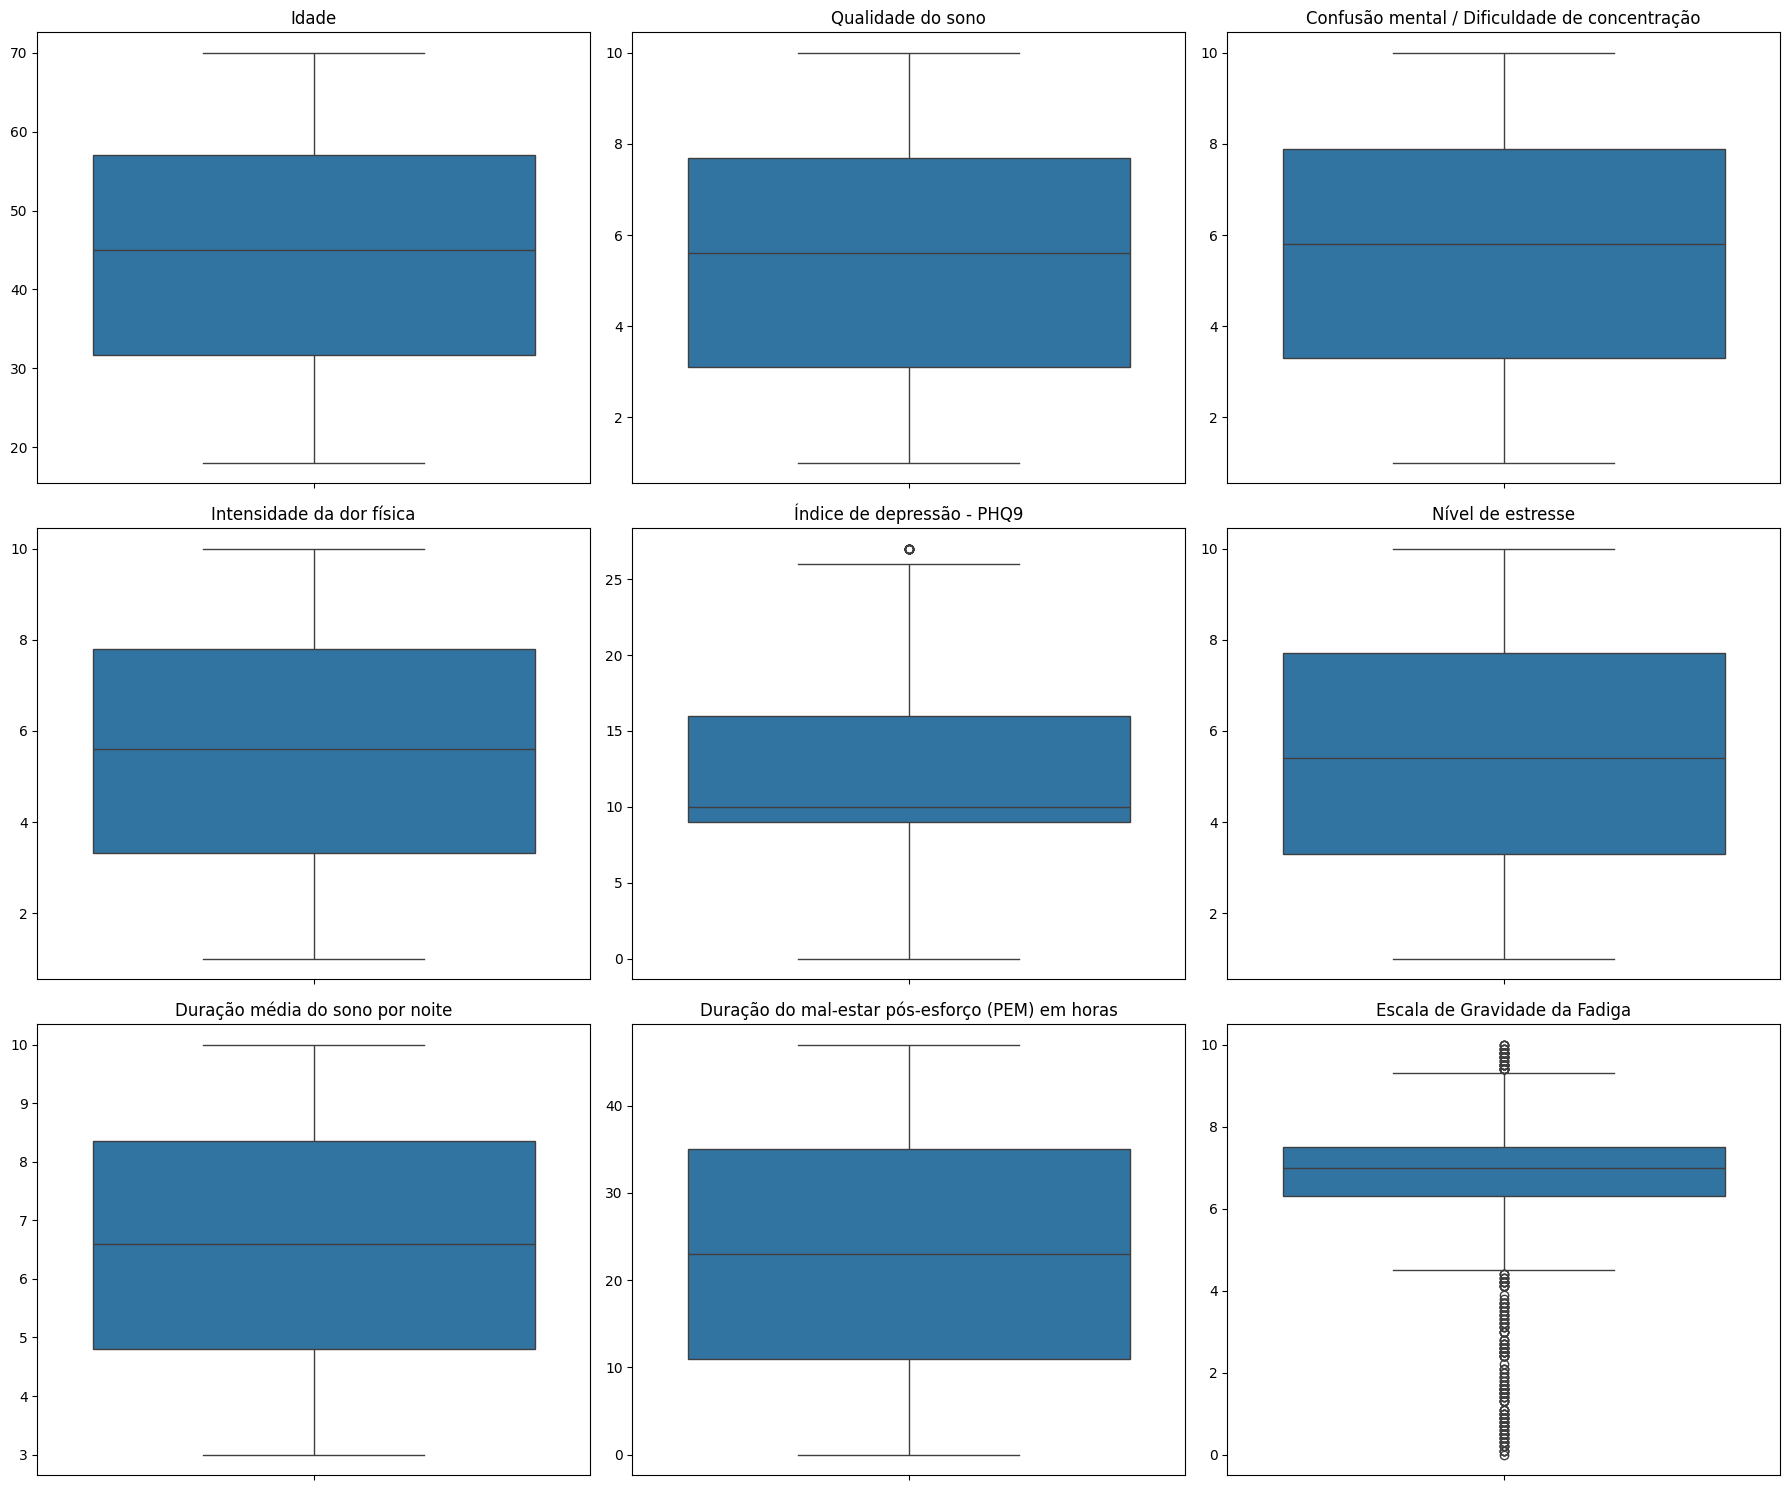

In [27]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15)) # Create a 3x3 grid of subplots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of columns to plot
columns_to_plot = [
    "age",
    "sleep_quality_index",
    "brain_fog_level",
    "physical_pain_score",
    "depression_phq9_score",
    "stress_level",
    "hours_of_sleep_per_night",
    "pem_duration_hours",
    "fatigue_severity_scale_score"
]

# Titles for the plots
plot_titles = [
    "Idade",
    "Qualidade do sono",
    "Confusão mental / Dificuldade de concentração",
    "Intensidade da dor física",
    "Índice de depressão - PHQ9",
    "Nível de estresse",
    "Duração média do sono por noite",
    "Duração do mal-estar pós-esforço (PEM) em horas",
    "Escala de Gravidade da Fadiga"
]

# Iterate through columns and axes to create box plots
for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(plot_titles[i])
    axes[i].set_ylabel("") # Remove y-axis label to avoid clutter

plt.tight_layout()
plt.show()

Analisando os gráficos, vemos que o "Índice de depressão (PHQ9)" apresenta um outlier, acima do valor de 25 e abaixo do valor de 19. Já o gráfico para a variável "Escala de gravidade da fadiga", há vários outliers, que estão acima ou abaixo da mediana.
Em ambos os casos, embora estatisticamente os dados sejam considerados como outliers, pois, estão longe da concentração central (mediana), não devemos desconsiderá-los para a predissão do modelo.
Os dados estão dentro do valor previsto para cada caso. No caso do Índice de depressão, este pode variar de 0 à 29, e podemos ver pelo gráfico que o outlier está dentro deste valor. O mesmo acontece para a Escala de gravidade da fadiga, todos os valores apresentados como outliers, estão dentro da escala esperada, entre 0 e 10. O que acontece neste caso é que, pode haver uma alta concentração de dados em torno da mediana e os dados podem estar assimetricamente distribuidos. Isto pode ser visto no gráfico a seguir, para o caso da Escala de gravidade da fagida:

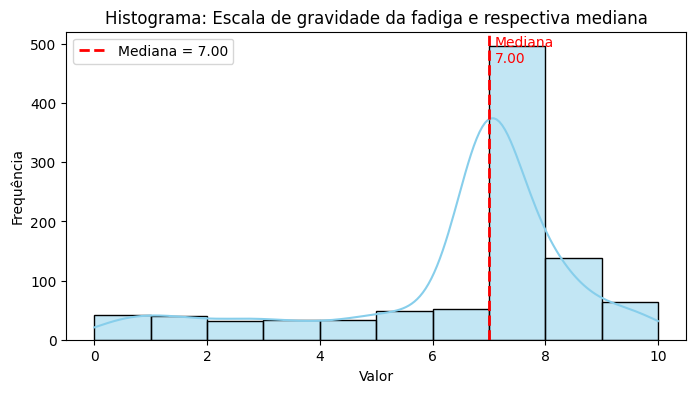

In [28]:
coluna = data["fatigue_severity_scale_score"].dropna()  # remove NaNs, se houver

mediana = np.median(coluna)

plt.figure(figsize=(8, 4))
sns.histplot(coluna, bins=10, kde=True, color="skyblue")

# Linha vertical indicando a mediana
plt.axvline(mediana, color='red', linestyle='--', linewidth=2, label=f'Mediana = {mediana:.2f}')

plt.text(mediana + 0.1, plt.ylim()[1]*0.9, f'Mediana\n{mediana:.2f}', color='red')

plt.title("Histograma: Escala de gravidade da fadiga e respectiva mediana")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.legend()
plt.show()


Nos histogramas a seguir, podemos ver que as demais variáveis possuem valores mais simetricamente distribuídos (excetuando o índice de depressão PHQ9).

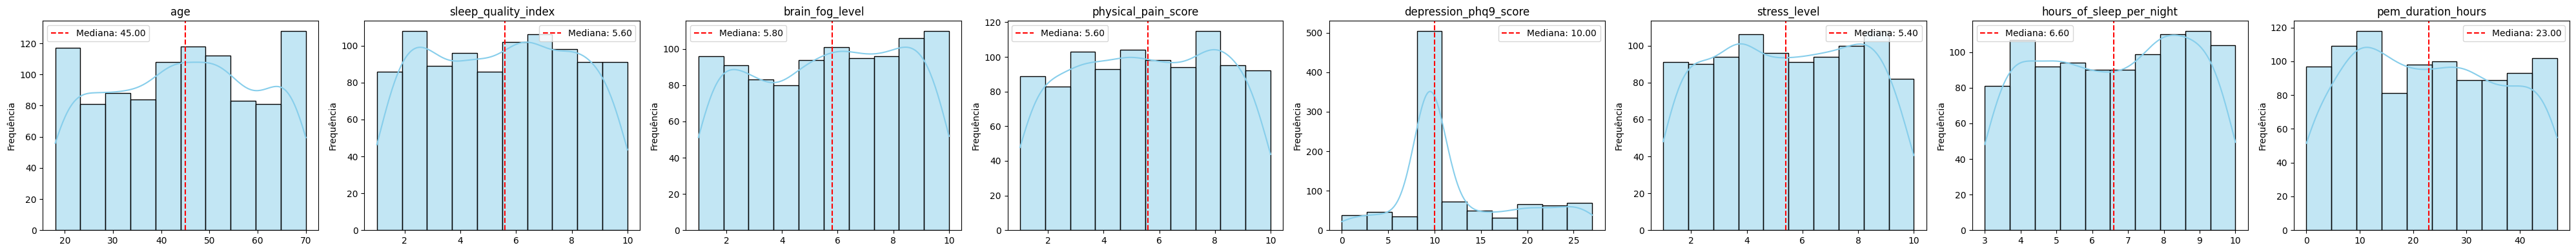

In [29]:
colunas = ["age",
    "sleep_quality_index",
    "brain_fog_level",
    "physical_pain_score",
    "depression_phq9_score",
    "stress_level",
    "hours_of_sleep_per_night",
    "pem_duration_hours",]
n = len(colunas)

plt.figure(figsize=(5 * n, 4))

for i, coluna in enumerate(colunas, 1):
    mediana = data[coluna].median()

    ax = plt.subplot(1, n, i)
    sns.histplot(data[coluna].dropna(), kde=True, bins=10, ax=ax, color="skyblue")
    ax.axvline(mediana, color='red', linestyle='--', label=f'Mediana: {mediana:.2f}')
    ax.set_title(f'{coluna}')
    ax.set_xlabel('')
    ax.set_ylabel('Frequência')
    ax.legend()

plt.tight_layout()
plt.show()

# Compreendendo melhor o diagnóstico segundo a base de dados

Observando os dados, podemos nos questionar sobre como os valores das variáveis podem influênciar no diagnóstico de cada paciente. Podemos nos perguntar sobre qual genêro é mais afetado pelas doenças, qual a realação entre estar trabalhando ou não, a idade dos pacientes e como a doença se manifesta na disposição do paciente após esforços físicos.

# Diagnóstico por gênero

No gráfico, podemos observar que para o diagnóstico que o paciente possui as duas doenças, não diferença entre a quantidade de afetados em relação ao genêro. Para os demais diagnósticos, é possível ver que o gênero masculino é mais afetado.

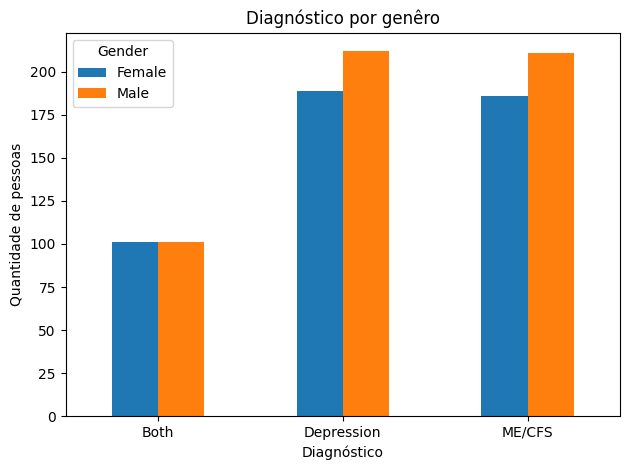

In [30]:
grouped = data.groupby(["diagnosis", "gender"]).size().unstack(fill_value=0)

grouped.plot(kind="bar")

plt.title("Diagnóstico por genêro")
plt.xlabel("Diagnóstico")
plt.ylabel("Quantidade de pessoas")
plt.xticks(rotation=0)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

# Relação entre trabalho e diagnóstico

Observando o gráfico e a soma das quantidades ao lado, podemos ver que há mais pacientes trabalhando de forma integral ou parcial do que desempregados. Isto significa que, para este grupo de pessoas estudadas, a depressão e/ou fadiga crônica, não se tornou um empecilho para as atividades diárias do indivíduo.
Na análise destes casos, podemos verificar o valor do índice PHQ-9 para a depressão e a escala de gravidade da fadiga, para analisarmos de forma melhor o quanto essas doenças estão com seus índices mais altos (índices graves, qua podem ser incapacitantes para a pessoa em sua vida profissional e pessoal).

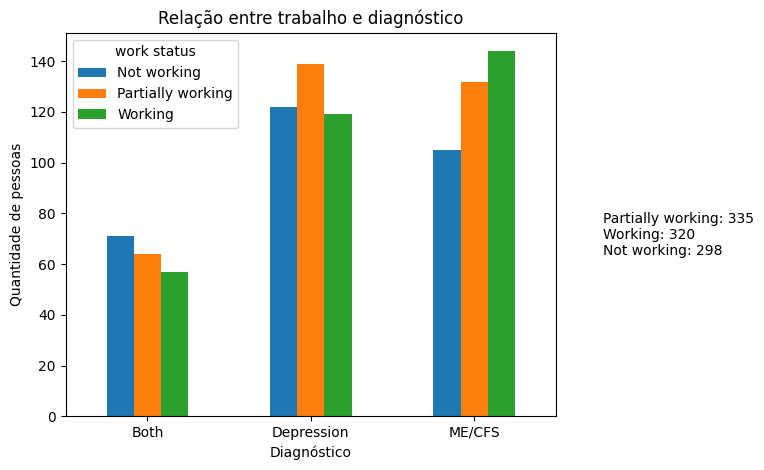

In [67]:
work_diagnosis = data.groupby(["diagnosis", "work_status"]).size().unstack(fill_value=0)
work_diagnosis.plot(kind="bar")

total_work_status = data["work_status"].value_counts()

plt.title("Relação entre trabalho e diagnóstico")
plt.xlabel("Diagnóstico")
plt.ylabel("Quantidade de pessoas")
plt.xticks(rotation=0)
plt.legend(title="work status")
plt.tight_layout()

texto_totais = "\n".join([f"{categoria}: {quantidade}" for categoria, quantidade in total_work_status.items()])
plt.gcf().text(0.95, 0.5, texto_totais, fontsize=10, va='center')

plt.tight_layout(rect=[0, 0, 0.9, 1])

plt.show()


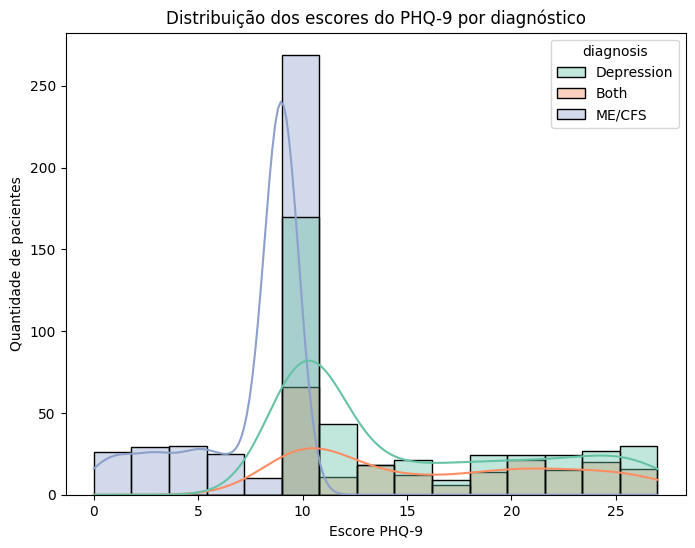

In [55]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x="depression_phq9_score", hue="diagnosis", kde=True, palette="Set2", alpha=0.4, bins=15)
plt.title("Distribuição dos escores do PHQ-9 por diagnóstico")
plt.xlabel("Escore PHQ-9")
plt.ylabel("Quantidade de pacientes")
plt.show()

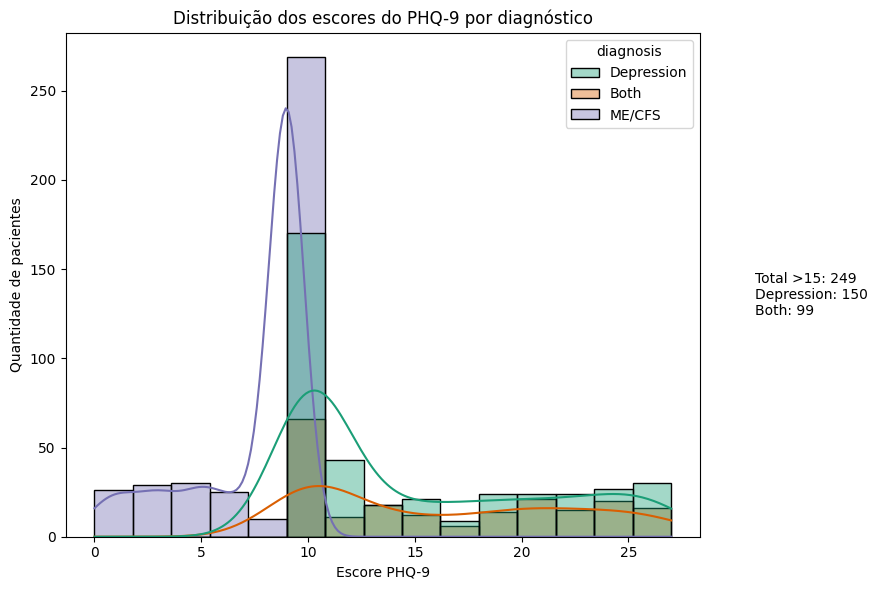

In [62]:
plt.figure(figsize=(8,6))
sns.histplot(
    data=data,
    x="depression_phq9_score",
    hue="diagnosis",
    kde=True,
    palette="Dark2",
    alpha=0.4,
    bins=15
)

plt.title("Distribuição dos escores do PHQ-9 por diagnóstico")
plt.xlabel("Escore PHQ-9")
plt.ylabel("Quantidade de pacientes")

# --- cálculo dos pacientes com PHQ-9 > 19 ---
total_acima15 = (data["depression_phq9_score"] > 15).sum()

# Se quiser também separado por diagnóstico:
por_diagnostico = data.loc[data["depression_phq9_score"] > 15, "diagnosis"].value_counts()

# Monta texto para mostrar
texto_totais = f"Total >15: {total_acima15}\n"
texto_totais += "\n".join([f"{diag}: {qtd}" for diag, qtd in por_diagnostico.items()])

# Adiciona na lateral direita do gráfico
plt.gcf().text(0.95, 0.5, texto_totais, fontsize=10, va='center')

# Ajusta layout para não cortar o texto
plt.tight_layout(rect=[0, 0, 0.9, 1])

plt.show()


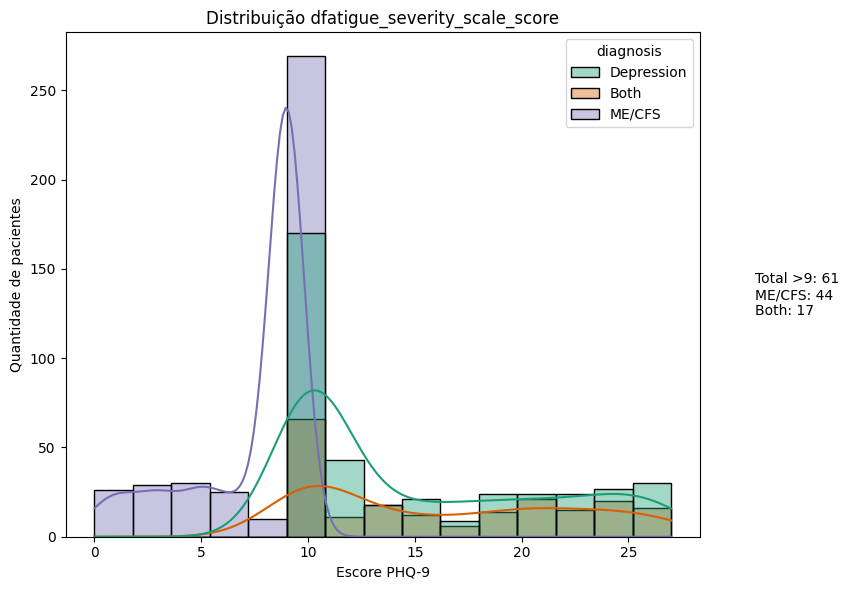

In [66]:
plt.figure(figsize=(8,6))
sns.histplot(
    data=data,
    x="depression_phq9_score",
    hue="diagnosis",
    kde=True,
    palette="Dark2",
    alpha=0.4,
    bins=15
)

plt.title("Distribuição dfatigue_severity_scale_score")
plt.xlabel("Escore PHQ-9")
plt.ylabel("Quantidade de pacientes")

# --- cálculo dos pacientes com PHQ-9 > 19 ---
total_acima6 = (data["fatigue_severity_scale_score"] > 9).sum()

# Se quiser também separado por diagnóstico:
por_diagnostico = data.loc[data["fatigue_severity_scale_score"] > 9, "diagnosis"].value_counts()

# Monta texto para mostrar
texto_totais = f"Total >9: {total_acima6}\n"
texto_totais += "\n".join([f"{diag}: {qtd}" for diag, qtd in por_diagnostico.items()])

# Adiciona na lateral direita do gráfico
plt.gcf().text(0.95, 0.5, texto_totais, fontsize=10, va='center')

# Ajusta layout para não cortar o texto
plt.tight_layout(rect=[0, 0, 0.9, 1])

plt.show()


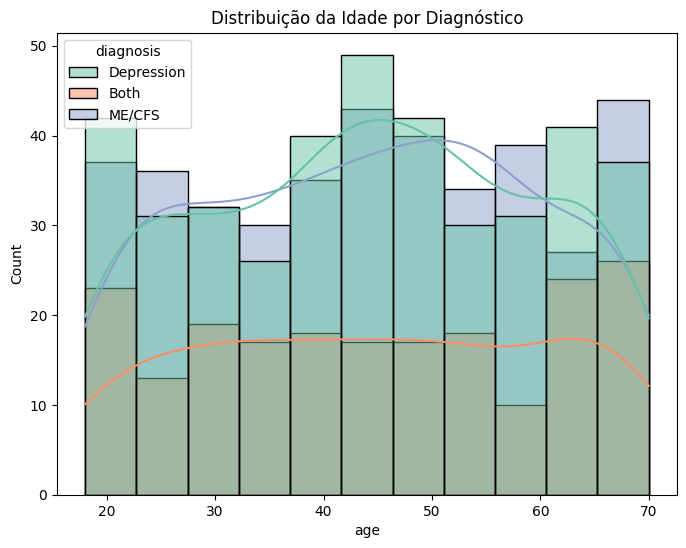

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="age", hue="diagnosis", kde=True, palette="Set2", alpha=0.5)
plt.title("Distribuição da Idade por Diagnóstico")
plt.show()

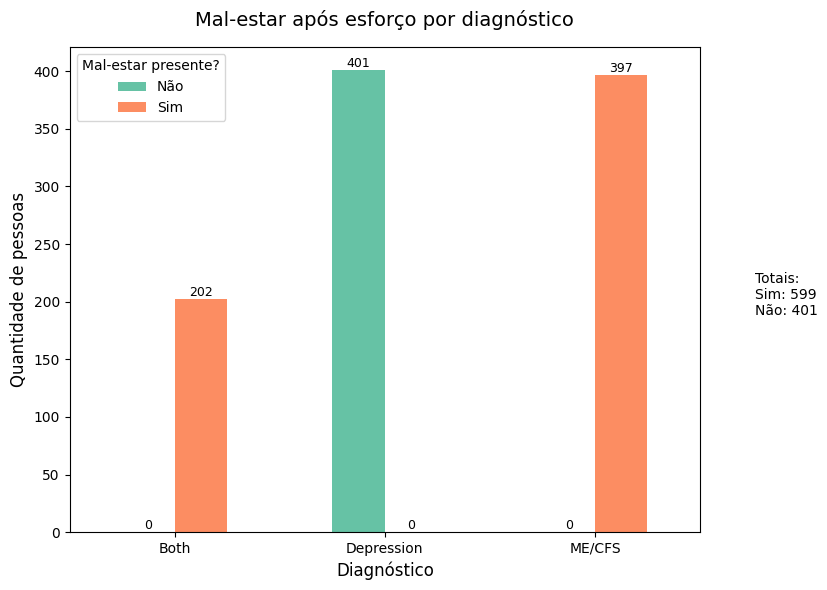

In [33]:
work_diagnosis = data.groupby(["diagnosis", "pem_present"]).size().unstack(fill_value=0)

work_diagnosis = work_diagnosis.rename(columns={0: "Não", 1: "Sim"})

colors = sns.color_palette("Set2", n_colors=2)

ax = work_diagnosis.plot(
    kind="bar",
    stacked=False,
    figsize=(8,6),
    color=colors
)

plt.title("Mal-estar após esforço por diagnóstico", fontsize=14, pad=15)
plt.xlabel("Diagnóstico", fontsize=12)
plt.ylabel("Quantidade de pessoas", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Mal-estar presente?")

for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", fontsize=9)

total_work_status = data["pem_present"].value_counts().rename({0: "Não", 1: "Sim"})
texto_totais = "\n".join([f"{categoria}: {quantidade}" for categoria, quantidade in total_work_status.items()])
plt.gcf().text(0.95, 0.5, "Totais:\n" + texto_totais, fontsize=10, va='center')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


# **Tratando inconsistências na base**

Verificando o "index" de cada valor categórico que possuem valores NaN:

In [34]:
print("Índices em 'work_status':", data[data["work_status"].isna()].index.tolist())
print("Índices em 'social_activity_level':", data[data["social_activity_level"].isna()].index.tolist())
print("Índices em 'exercise_frequency':", data[data["exercise_frequency"].isna()].index.tolist())
print("Índices em 'meditation_or_mindfulness':", data[data["meditation_or_mindfulness"].isna()].index.tolist())

Índices em 'work_status': [11, 26, 41, 107, 124, 133, 137, 158, 169, 189, 196, 228, 239, 271, 277, 281, 308, 369, 385, 410, 443, 454, 455, 460, 467, 468, 480, 488, 513, 516, 548, 597, 605, 662, 664, 693, 725, 727, 733, 734, 813, 835, 879, 911, 922, 934, 948]
Índices em 'social_activity_level': [2, 39, 61, 69, 113, 129, 136, 141, 143, 147, 155, 179, 185, 200, 201, 256, 267, 307, 319, 325, 328, 383, 408, 421, 428, 489, 521, 522, 573, 634, 709, 735, 768, 787, 850, 851, 868, 967, 980, 988]
Índices em 'exercise_frequency': [8, 72, 94, 113, 165, 205, 217, 221, 234, 287, 295, 315, 323, 348, 356, 400, 433, 436, 439, 541, 551, 605, 609, 627, 637, 667, 708, 710, 747, 806, 824, 845, 858, 879, 890, 934, 988, 992, 995]
Índices em 'meditation_or_mindfulness': [37, 135, 280, 282, 331, 559, 566, 572, 580, 843, 950]


In [35]:
from collections import defaultdict

# Suas listas de índices
work_index = data[data["work_status"].isna()].index.tolist()
social_index = data[data["social_activity_level"].isna()].index.tolist()
exercise_index = data[data["exercise_frequency"].isna()].index.tolist()
meditation_index = data[data["meditation_or_mindfulness"].isna()].index.tolist()


# Junta todos os índices em um conjunto único
todos_indices = set(work_index + social_index + exercise_index + meditation_index)

# Verifica a contagem de categorias em que cada índice aparece
resultados = {i: sum([i in work_index, i in social_index, i in exercise_index, i in meditation_index]) for i in todos_indices}

# Separa os índices por número de categorias
in_4 = [i for i, count in resultados.items() if count == 4]
in_3 = [i for i, count in resultados.items() if count == 3]
in_2 = [i for i, count in resultados.items() if count == 2]

# Mostra os resultados
print("🔹 Índices presentes em 4 categorias:")
print(in_4)

print("\n🔸 Índices presentes em 3 categorias:")
print(in_3)

print("\n▪️ Índices presentes em 2 categorias:")
print(in_2)

🔹 Índices presentes em 4 categorias:
[]

🔸 Índices presentes em 3 categorias:
[]

▪️ Índices presentes em 2 categorias:
[605, 113, 879, 934, 988]


In [36]:
categorical_data = data.select_dtypes(include=['object'])
categorical_data.isna().sum()

,0
gender,0
work_status,47
social_activity_level,40
exercise_frequency,39
meditation_or_mindfulness,11
diagnosis,0


In [37]:
categorical_data.fillna("Unknown", inplace=True)
categorical_data.isna().sum()

,0
gender,0
work_status,0
social_activity_level,0
exercise_frequency,0
meditation_or_mindfulness,0
diagnosis,0


Transformando os valores do tipo categórico para numérico utilizando a técnica de Label Enconding sem definir a ordem dos valores para cada variável:

In [38]:
categorical_data_encoded = categorical_data.copy()
for col in categorical_data_encoded.columns:
    if categorical_data_encoded[col].dtype == 'object':
        le = LabelEncoder()
        categorical_data_encoded[col] = le.fit_transform(categorical_data_encoded[col])

display(categorical_data_encoded.head())

,gender,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,1,3,1,0,2,1
1,1,3,1,2,2,0
2,0,1,3,3,2,1
3,0,0,0,1,2,1
4,0,0,1,3,0,0


Verificando a quantidade de valores numéricos nulos e adicionando o valor "zero":

In [39]:
numerical_data = data.select_dtypes(include=[np.number])
numerical_data.isnull().sum()

,0
age,0
sleep_quality_index,47
brain_fog_level,48
physical_pain_score,34
stress_level,48
depression_phq9_score,22
fatigue_severity_scale_score,21
pem_duration_hours,24
hours_of_sleep_per_night,21
pem_present,0


In [40]:
numerical_data.fillna("0", inplace=True)
numerical_data.isnull().sum()

/tmp/ipython-input-2852103615.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  numerical_data.fillna("0", inplace=True)


,0
age,0
sleep_quality_index,0
brain_fog_level,0
physical_pain_score,0
stress_level,0
depression_phq9_score,0
fatigue_severity_scale_score,0
pem_duration_hours,0
hours_of_sleep_per_night,0
pem_present,0


Juntando toda a base de dados:

In [41]:
treated_data = pd.concat([numerical_data, categorical_data_encoded], axis=1)
display(treated_data.head())
treated_data.info()

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,gender,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,1,3,1,0,2,1
1,69,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,1,3,1,2,2,0
2,46,4.0,5.4,4.8,0,24.0,1.6,13.0,6.9,0,0,1,3,3,2,1
3,32,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,0,0,0,1,2,1
4,60,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,0,0,1,3,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   age                           1000 non-null   int64 
 1   sleep_quality_index           1000 non-null   object
 2   brain_fog_level               1000 non-null   object
 3   physical_pain_score           1000 non-null   object
 4   stress_level                  1000 non-null   object
 5   depression_phq9_score         1000 non-null   object
 6   fatigue_severity_scale_score  1000 non-null   object
 7   pem_duration_hours            1000 non-null   object
 8   hours_of_sleep_per_night      1000 non-null   object
 9   pem_present                   1000 non-null   int64 
 10  gender                        1000 non-null   int64 
 11  work_status                   1000 non-null   int64 
 12  social_activity_level         1000 non-null   int64 
 13  exercise_frequency 

In [42]:
treated_data.shape

(1000, 16)

<Axes: xlabel='age'>

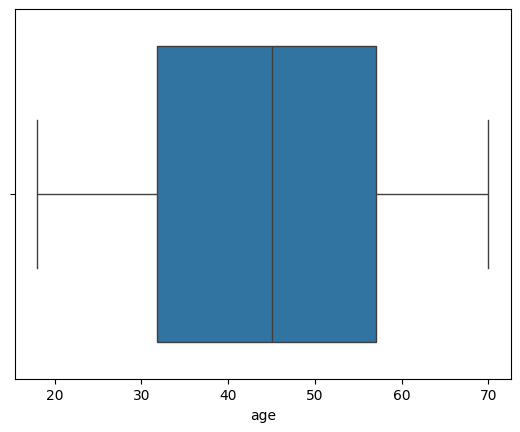

In [43]:
sns.boxplot(x=data["age"])

<Axes: xlabel='age', ylabel='Count'>

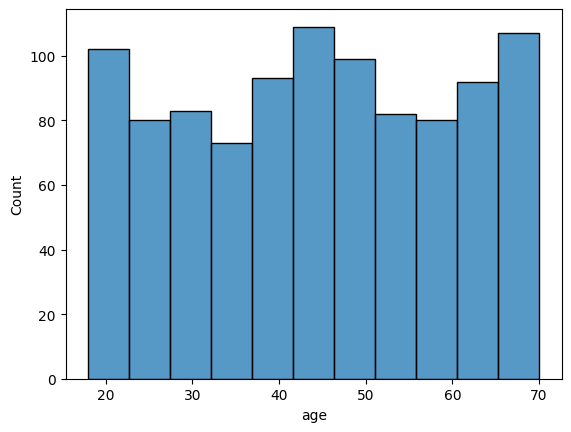

In [44]:
sns.histplot(data=data, x="age")

<Axes: >

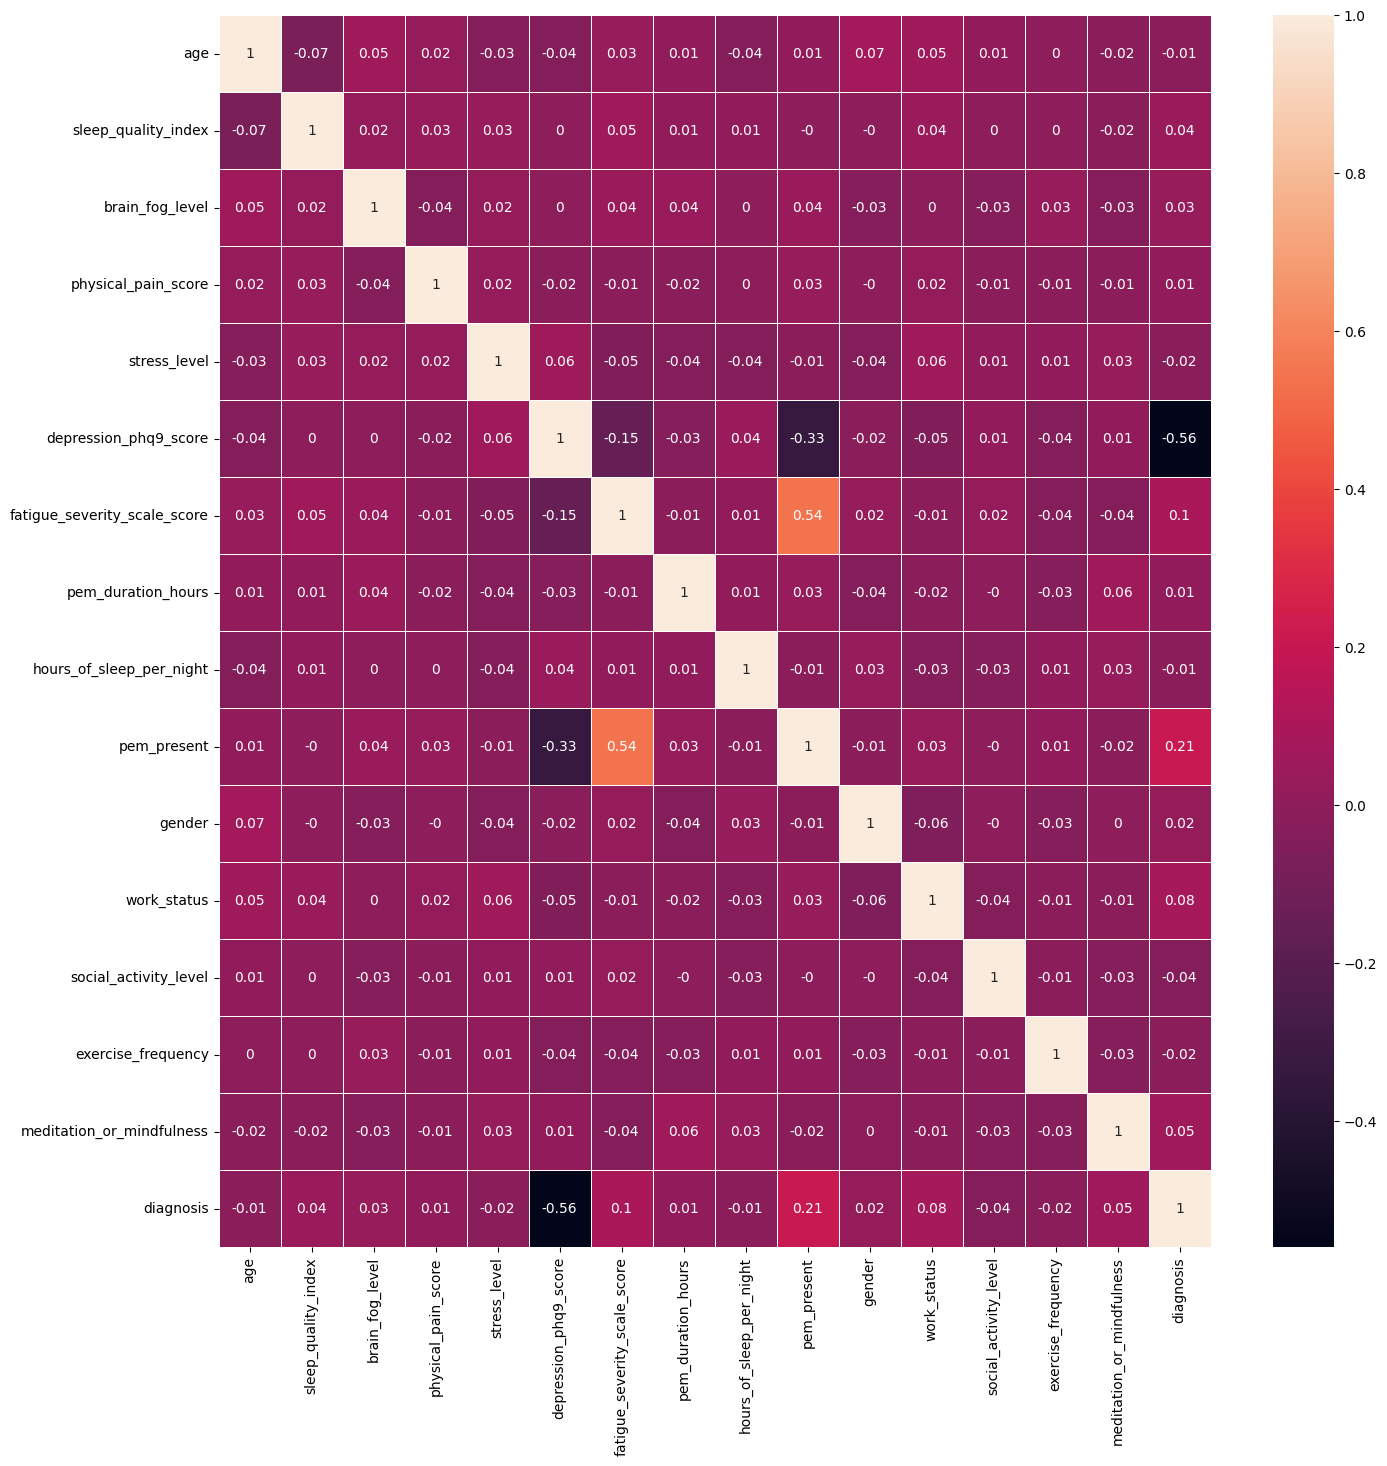

In [45]:
#NÃO SEI SE FAZ SENTIDO PARA EM CASOS DE CLASSIFICAÇÃO E NÃO REGRESSÃO
correlation_matrix = treated_data.corr().round(2)

fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

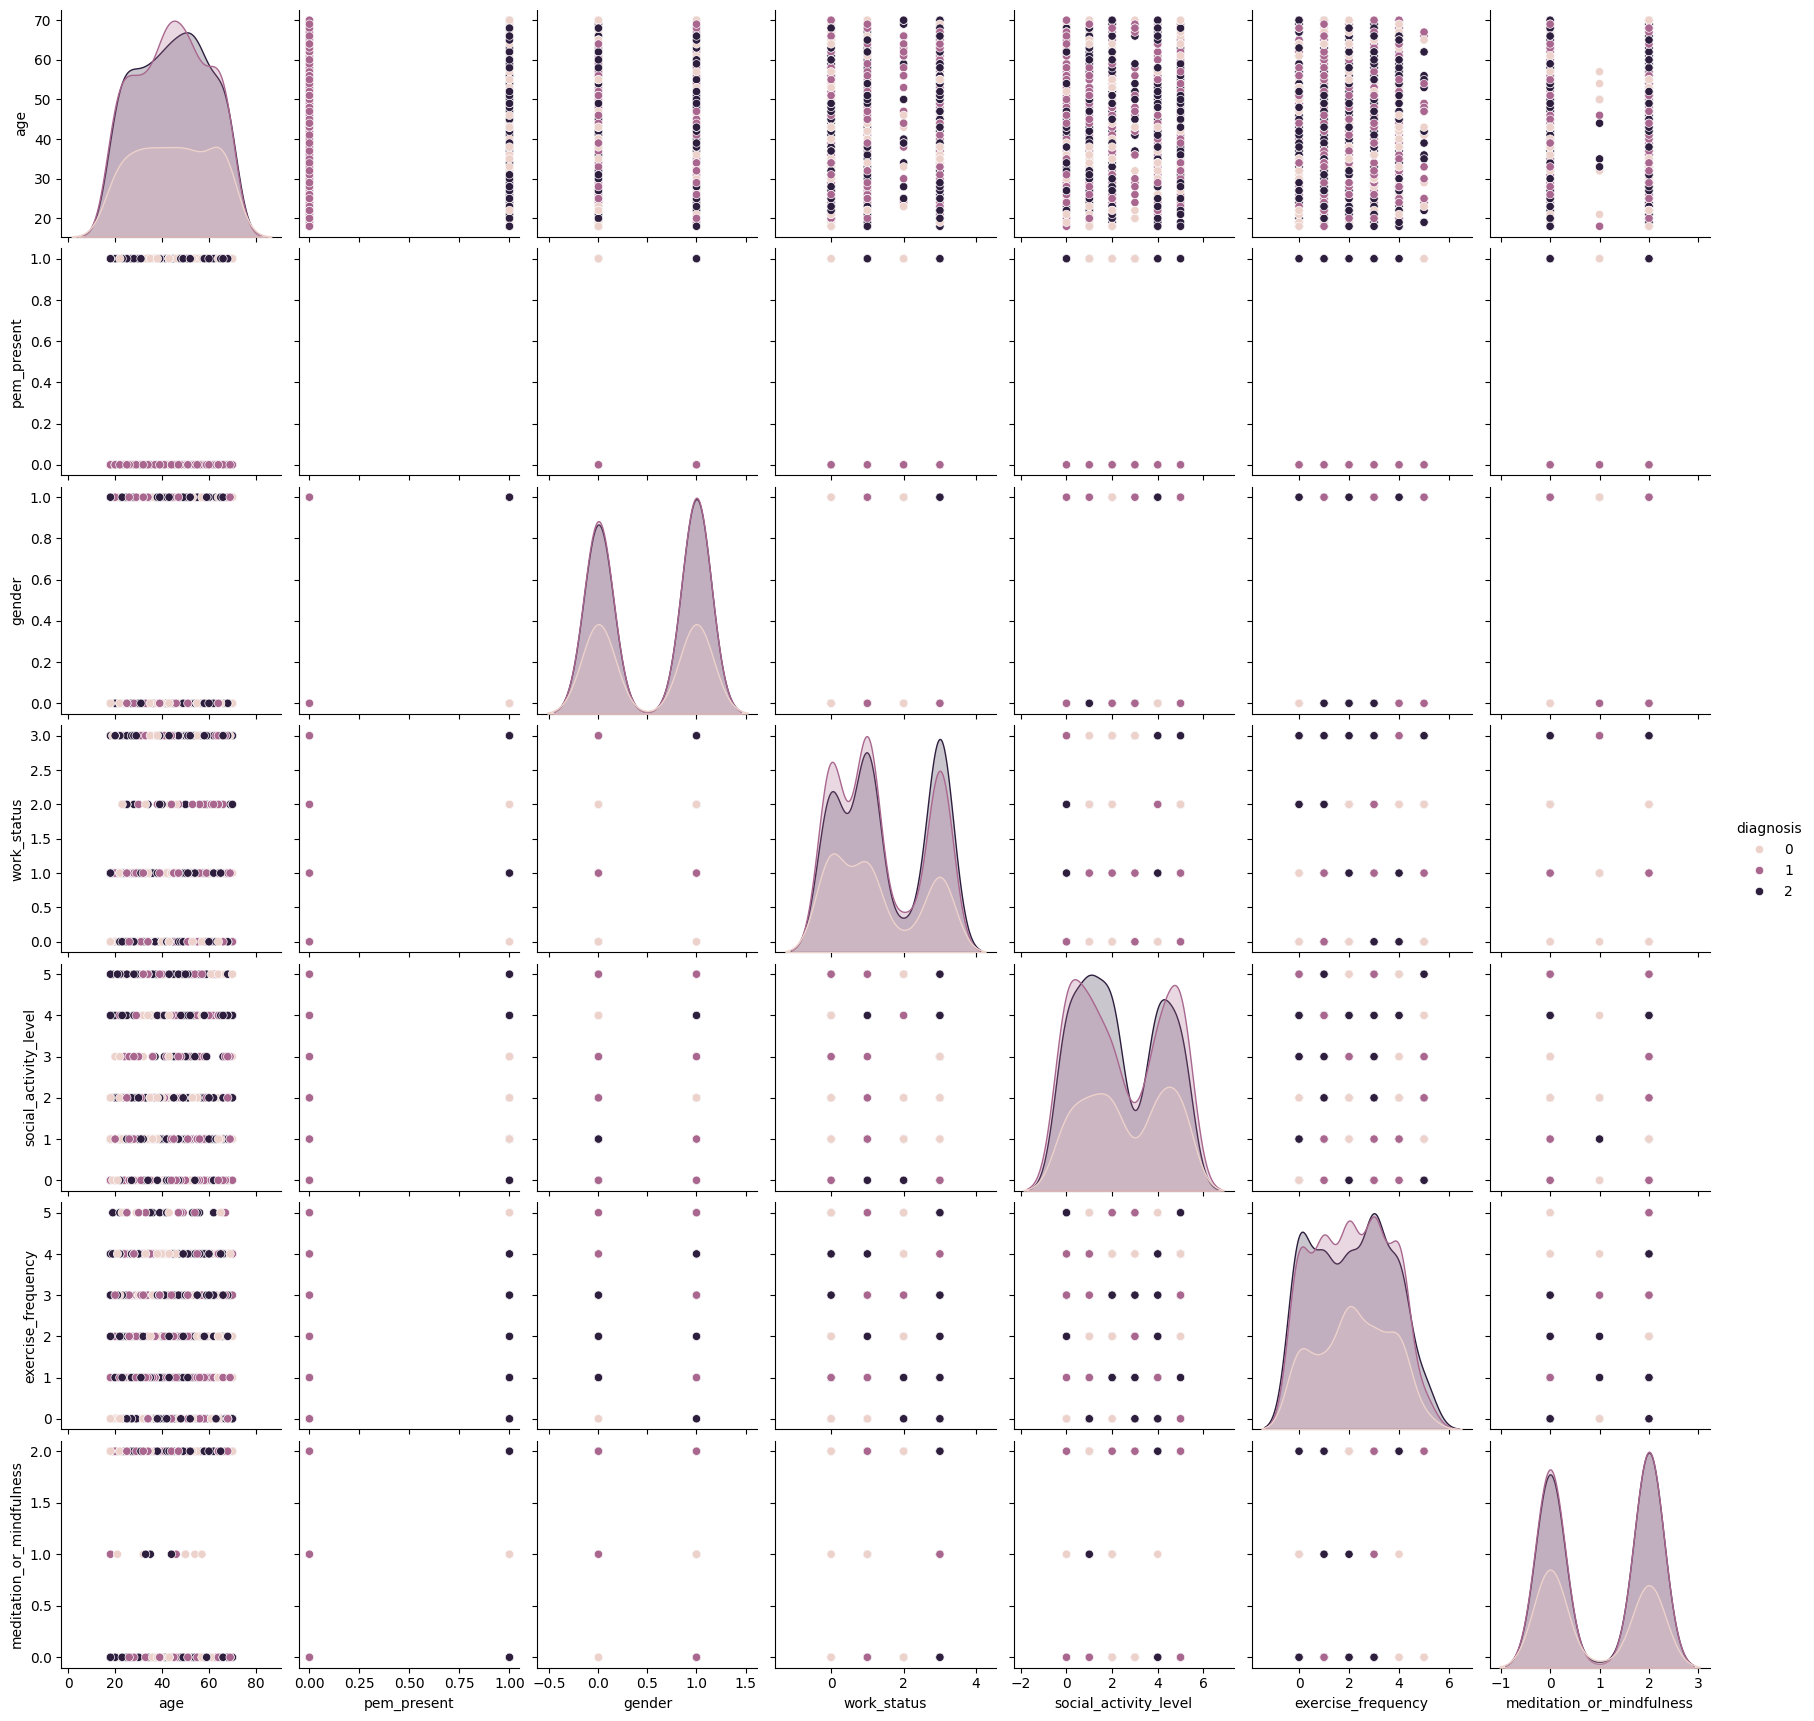

In [46]:
sns.pairplot(treated_data, hue="diagnosis")
plt.show()

# **Análise exploratória dos dados**

# **Criação dos modelos de Machine Learning**

**Separação da base de treino e de teste**

In [47]:
x = treated_data.drop("diagnosis", axis=1)
y = treated_data["diagnosis"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model_lr =  LogisticRegression(max_iter=2000)
model_lr.fit(x_train, y_train)

predictions_lr = model_lr.predict(x_test)

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82        39
           1       1.00      0.99      0.99        83
           2       0.86      1.00      0.92        78

    accuracy                           0.94       200
   macro avg       0.95      0.89      0.91       200
weighted avg       0.94      0.94      0.93       200



In [49]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions_lr)
print(cm)

[[27  0 12]
 [ 0 82  1]
 [ 0  0 78]]


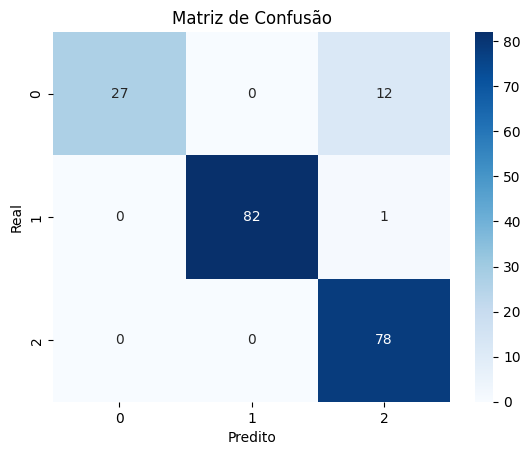

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

for model_name, model_class in classifiers:
  model = model_class
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)

  print(f"Acurácia do modelo {model_name}: {accuracy}")

Acurácia do modelo Decision Tree: 0.99
Acurácia do modelo Random Forest: 0.995
Acurácia do modelo AdaBoost: 0.995
Acurácia do modelo Gradient Boosting: 0.995
Acurácia do modelo K-Nearest Neighbors: 0.58
Acurácia do modelo AdaBoost: 0.995
Acurácia do modelo Naive Bayes: 0.925
